<a href="https://colab.research.google.com/github/Chandru-21/Anomaly-Detection/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Importing dependencies


In [4]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from time import time
import matplotlib.dates as md
import plotly.express as px
import numpy as np
import os
from sklearn.ensemble import IsolationForest

Loading Data

In [5]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sample.csv")

In [ ]:
data.head()

,sys_created_on,number,application
0,20-02-2020 02:39,TKT11229739,APP1
1,20-02-2020 02:15,TKT11229704,APP2
2,20-02-2020 09:23,TKT11230676,APP3
3,20-02-2020 09:22,TKT11230671,APP1
4,20-02-2020 19:55,TKT11234811,APP4


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93363 entries, 0 to 93362
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sys_created_on  93363 non-null  object
 1   number          93363 non-null  object
 2   application     93363 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


Feature Engineering

In [6]:
data.rename(columns={'sys_created_on': 'time'}, inplace=True)

In [7]:
data['time'] = pd.to_datetime(data['time'])
data['date_only'] = data['time'].dt.date
data['Day name '] = data['time'].dt.day_name()
data['is_weekend'] = data['Day name '].apply(lambda x : 1 if x in ['Saturday','Sunday'] else 0)



In [8]:
data['application'].value_counts()


APP1    19664
APP2    17850
APP3    15042
APP4    14542
APP5     7806
APP9     5843
APP6     5320
APP7     3692
APP8     3604
Name: application, dtype: int64

APP1    19664
APP2    17850
APP3    15042
APP4    14542
APP5     7806
APP9     5843
APP6     5320
APP7     3692
APP8     3604
Name: application, dtype: int64


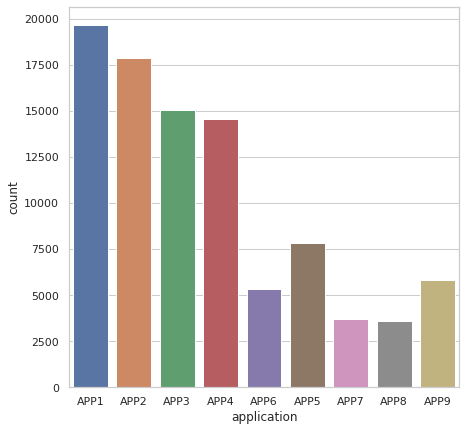

In [19]:
fig, ax1 = plt.subplots(figsize=(7,7))
graph = sns.countplot(x='application', data=data)

print(data['application'].value_counts())

In [9]:
weekend=data[data['is_weekend']==1]
weekdays=data[data['is_weekend']==0]

In [10]:
c=weekdays.groupby(['date_only','application']).nunique()
c.info()
c=c.drop(['time', 'Day name ','is_weekend'], axis = 1)

d=c.unstack().T
d=d.fillna(0)
d.reset_index(inplace = True)
d.info()
d=d.drop(['level_0'], axis = 1)


d = d.set_index(['application'])
e=d.T

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2684 entries, (datetime.date(2020, 1, 1), 'APP1') to (datetime.date(2021, 12, 3), 'APP9')
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   time        2684 non-null   int64
 1   number      2684 non-null   int64
 2   Day name    2684 non-null   int64
 3   is_weekend  2684 non-null   int64
dtypes: int64(4)
memory usage: 94.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Columns: 350 entries, level_0 to 2021-12-03
dtypes: float64(348), object(2)
memory usage: 24.7+ KB


In [22]:
a1=d.iloc[0]
a1=pd.DataFrame(a1)
a1.reset_index(inplace = True)

a2=d.iloc[1]
a2=pd.DataFrame(a2)
a2.reset_index(inplace = True)


a3=d.iloc[2]
a3=pd.DataFrame(a3)
a3.reset_index(inplace = True)


a4=d.iloc[3]
a4=pd.DataFrame(a4)
a4.reset_index(inplace = True)


a5=d.iloc[4]
a5=pd.DataFrame(a5)
a5.reset_index(inplace = True)


a6=d.iloc[5]
a6=pd.DataFrame(a6)
a6.reset_index(inplace = True)

a7=d.iloc[6]
a7=pd.DataFrame(a7)
a7.reset_index(inplace = True)

a8=d.iloc[7]
a8=pd.DataFrame(a8)
a8.reset_index(inplace = True)

a9=d.iloc[8]
a9=pd.DataFrame(a9)
a9.reset_index(inplace = True)

print(a1)

      date_only   APP1
0    2020-01-01    1.0
1    2020-01-02    1.0
2    2020-01-03    1.0
3    2020-01-06   28.0
4    2020-01-07   50.0
..          ...    ...
343  2021-11-03   25.0
344  2021-11-04    2.0
345  2021-12-01  118.0
346  2021-12-02   44.0
347  2021-12-03   19.0

[348 rows x 2 columns]


## EDA

In [ ]:
def plot(data,x,y):
    
    import matplotlib.dates as md
    # prepare the figure
    fig, ax = plt.subplots(figsize = (15, 7))
    
    # set up the plot
    sns.lineplot(ax = ax,data=data, x=x, y=y)
    # specify the position of the major ticks at the beginning of the week
    ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1))
    # specify the format of the labels as 'year-month-day'
    ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
    # (optional) rotate by 90° the labels in order to improve their spacing
    plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
    
    # specify the position of the minor ticks at each day
    ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))
    
    
    ax.tick_params(axis = 'x', which = 'major', length = 10)
    ax.tick_params(axis = 'x', which = 'minor', length = 5)
    
    # set axes labels
    plt.xlabel('Date')
    plt.ylabel('Tickets')
    
    # show the plot
    plt.show()


##Outlier Detection

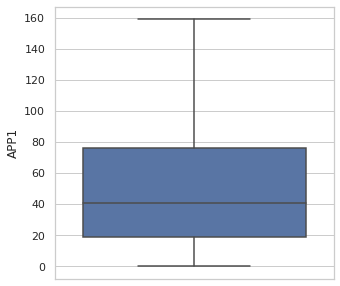

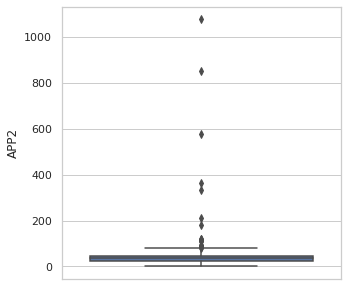

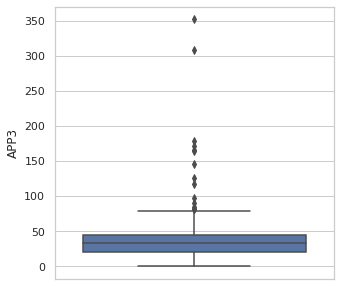

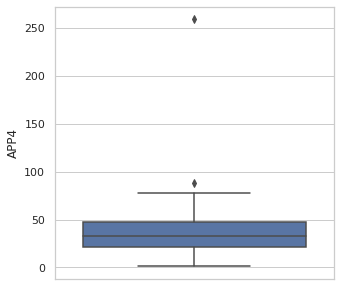

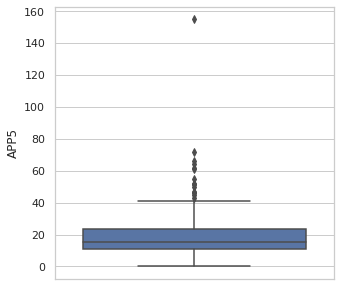

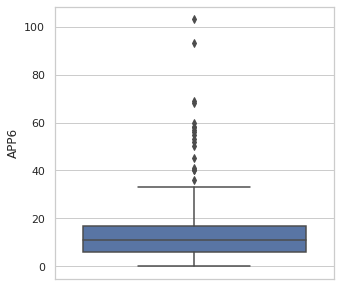

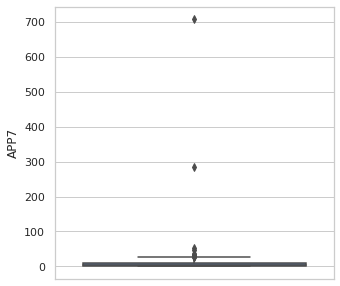

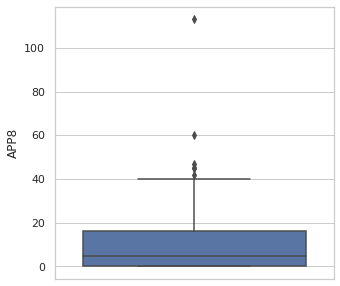

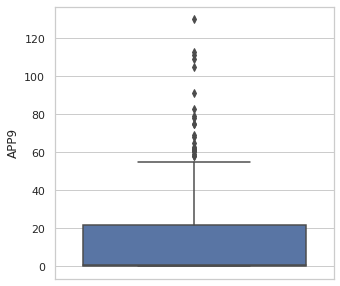

In [ ]:
plt.figure(figsize=(5,5))
sns.set_theme(style="whitegrid")
sns.boxplot(y=a1["APP1"])


plt.figure(figsize=(5,5))
sns.set_theme(style="whitegrid")
sns.boxplot(y=a2["APP2"])


plt.figure(figsize=(5,5))
sns.set_theme(style="whitegrid")
sns.boxplot(y=a3["APP3"])


plt.figure(figsize=(5,5))
sns.set_theme(style="whitegrid")
sns.boxplot(y=a4["APP4"])


plt.figure(figsize=(5,5))
sns.set_theme(style="whitegrid")
sns.boxplot(y=a5["APP5"])


plt.figure(figsize=(5,5))
sns.set_theme(style="whitegrid")
sns.boxplot(y=a6["APP6"])


plt.figure(figsize=(5,5))
sns.set_theme(style="whitegrid")
sns.boxplot(y=a7["APP7"])

plt.figure(figsize=(5,5))
sns.set_theme(style="whitegrid")
sns.boxplot(y=a8["APP8"])



plt.figure(figsize=(5,5))
sns.set_theme(style="whitegrid")
sns.boxplot(y=a9["APP9"])

## outlier elimination

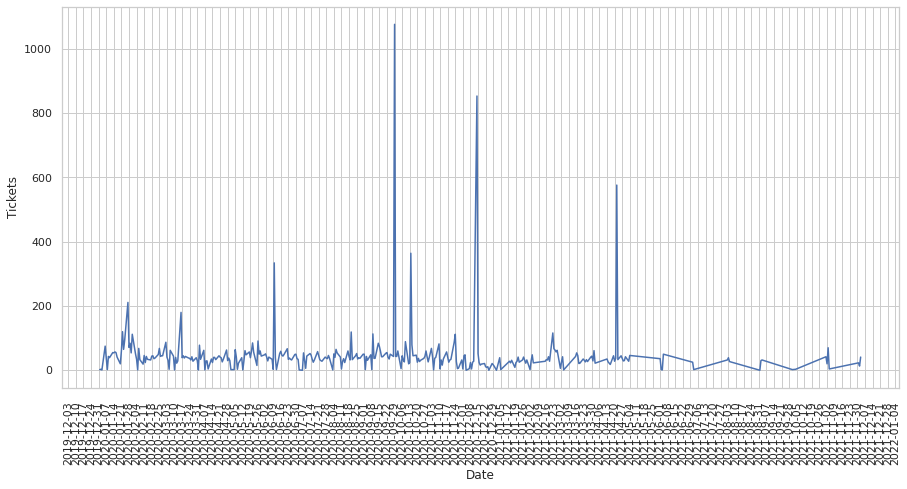

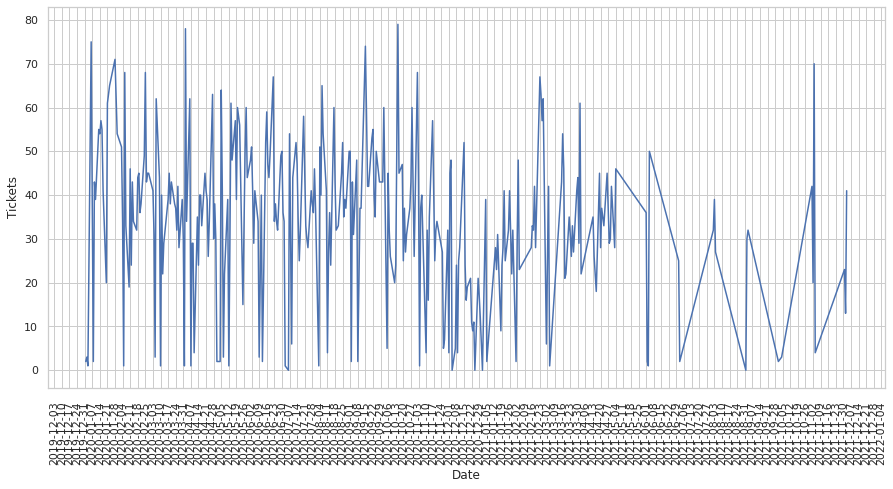

In [ ]:

Q1 = a2['APP2'].quantile(0.25)
Q3 = a2['APP2'].quantile(0.75)
IQR = Q3 - Q1

test1 = a2['APP2'] < (Q1 - 1.5 * IQR)
test2 = a2['APP2'] > (Q3 + 1.5 * IQR)
a2['without anomaly']= a2['APP2'][~((a2['APP2'] < (Q1 - 1.5 * IQR)) |(a2['APP2'] > (Q3 + 1.5 * IQR)))]

plot(a2,"date_only","APP2")
plot(a2,"date_only","without anomaly")

# ISOLATION FOREST TO DETECT ANOMALIES

Feature Engineering

In [23]:
c1=weekdays.groupby(['date_only','application']).nunique()
c1.info()
c1=c1.drop(['time','is_weekend','Day name '], axis = 1)

d1=c1.unstack().T
d1=d1.fillna(0)
d1.reset_index(inplace = True)
d1.info()
d1=d1.drop(['level_0'], axis = 1)

d1 = d1.set_index(['application'])
e1=d1.T

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2684 entries, (datetime.date(2020, 1, 1), 'APP1') to (datetime.date(2021, 12, 3), 'APP9')
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   time        2684 non-null   int64
 1   number      2684 non-null   int64
 2   Day name    2684 non-null   int64
 3   is_weekend  2684 non-null   int64
dtypes: int64(4)
memory usage: 94.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Columns: 350 entries, level_0 to 2021-12-03
dtypes: float64(348), object(2)
memory usage: 24.7+ KB


## Anomalies in application 1




In [24]:
a1=d1.iloc[0]
a1=pd.DataFrame(a1)
a1.reset_index(inplace = True)

a1.info()

fig = px.line(a1.reset_index(), x='date_only', y='APP1', title='tickets per day for application1')
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_only  348 non-null    object 
 1   APP1       348 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.6+ KB


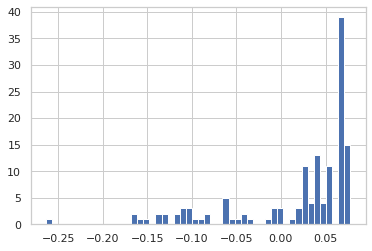

In [ ]:
model = IsolationForest()
model.fit(a1[['APP1']])

a1['outliers'] = pd.Series(model.predict(a1[['APP1']])).apply(lambda x: 'yes' if (x==-1) else 'no')

score=model.decision_function(a1[['APP1']])
#print(score)

plt.hist(score, bins=50)

a1['scores'] = score


a1_anomaly=a1.query('scores<-0.05')##anamoly points
fig = px.scatter(a1.reset_index(), x='date_only', y='APP1', color='outliers', 
                 hover_data=['date_only'], title='tickets per day for application1')
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()

## Anomalies in application 2

In [ ]:
a2=d1.iloc[1]
a2=pd.DataFrame(a2)
a2.reset_index(inplace = True)




fig = px.line(a2.reset_index(), x='date_only', y='APP2', title='tickets per day for application2')
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()


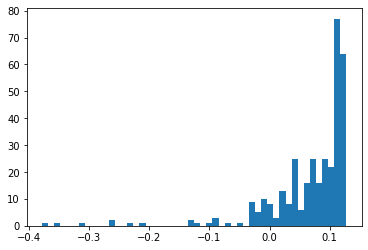

In [ ]:
model = IsolationForest()
model.fit(a2[['APP2']])

a2['outliers'] = pd.Series(model.predict(a2[['APP2']])).apply(lambda x: 'yes' if (x==-1) else 'no')

score=model.decision_function(a2[['APP2']])
#print(score)

plt.hist(score, bins=50)

a2['scores'] = score


a2_anomaly=a2.query('scores<-0.0')##anamoly points


fig = px.scatter(a2.reset_index(), x='date_only', y='APP2', color='outliers', 
                 hover_data=['date_only'], title='tickets per day for application2')
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()

## Anomalies in application 3

In [ ]:
a3=d1.iloc[2]
a3=pd.DataFrame(a3)
a3.reset_index(inplace = True)
fig = px.line(a3.reset_index(), x='date_only', y='APP3', title='tickets per day for application3')
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()

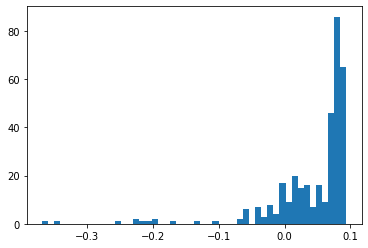

In [ ]:
model = IsolationForest()
model.fit(a3[['APP3']])

a3['outliers'] = pd.Series(model.predict(a3[['APP3']])).apply(lambda x: 'yes' if (x==-1) else 'no')

score=model.decision_function(a3[['APP3']])
#print(score)

plt.hist(score, bins=50)

a3['scores'] = score


a3_anomaly=a3.query('scores<-0.05')##anomaly points


fig = px.scatter(a3.reset_index(), x='date_only', y='APP3', color='outliers', 
                 hover_data=['date_only'], title='tickets per day for application3')
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()


## Anomalies in application 4

In [ ]:
a4=d1.iloc[3]
a4=pd.DataFrame(a4)
a4.reset_index(inplace = True)

fig = px.line(a4.reset_index(), x='date_only', y='APP4', title='tickets per day for application4')
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()

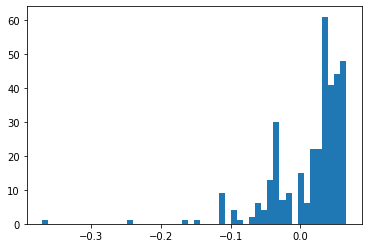

In [ ]:
model = IsolationForest()
model.fit(a4[['APP4']])

a4['outliers'] = pd.Series(model.predict(a4[['APP4']])).apply(lambda x: 'yes' if (x==-1) else 'no')

score=model.decision_function(a4[['APP4']])
#print(score)

plt.hist(score, bins=50)

a4['scores'] = score


a4_anomaly=a4.query('scores<-0.05')##anomaly points


fig = px.scatter(a4.reset_index(), x='date_only', y='APP4', color='outliers', 
                 hover_data=['date_only'], title='tickets per day for application4')
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()


## Anomalies in application 5

In [ ]:
a5=d1.iloc[4]
a5=pd.DataFrame(a5)
a5.reset_index(inplace = True)

fig = px.line(a5.reset_index(), x='date_only', y='APP5', title='tickets per day for application5')
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()


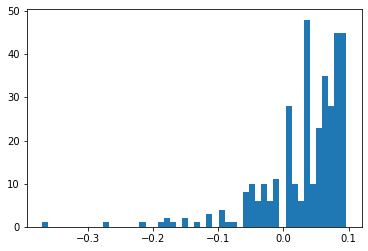

In [ ]:
model = IsolationForest()
model.fit(a5[['APP5']])

a5['outliers'] = pd.Series(model.predict(a5[['APP5']])).apply(lambda x: 'yes' if (x==-1) else 'no')

score=model.decision_function(a5[['APP5']])
#print(score)

plt.hist(score, bins=50)

a5['scores'] = score


a5_anomaly=a5.query('scores<-0.01')##anomaly points


fig = px.scatter(a5.reset_index(), x='date_only', y='APP5', color='outliers', 
                 hover_data=['date_only'], title='tickets per day for application5')
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()



## Anomalies in application 6

In [ ]:
a6=d1.iloc[5]
a6=pd.DataFrame(a6)
a6.reset_index(inplace = True)

fig = px.line(a6.reset_index(), x='date_only', y='APP6', title='tickets per day for application6')
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()


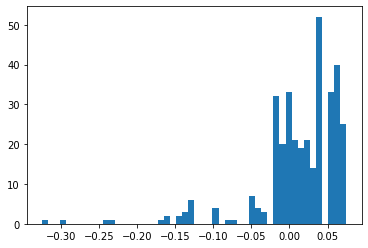

In [ ]:
model = IsolationForest()
model.fit(a6[['APP6']])

a6['outliers'] = pd.Series(model.predict(a6[['APP6']])).apply(lambda x: 'yes' if (x==-1) else 'no')

score=model.decision_function(a6[['APP6']])
#print(score)

plt.hist(score, bins=50)

a6['scores'] = score


a6_anomaly=a6.query('scores<-0.02')##anomaly points


fig = px.scatter(a6.reset_index(), x='date_only', y='APP6', color='outliers', 
                 hover_data=['date_only'], title='tickets per day for application6')
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()

## Anomalies in application 7

In [ ]:
a7=d1.iloc[6]
a7=pd.DataFrame(a7)
a7.reset_index(inplace = True)

fig = px.line(a7.reset_index(), x='date_only', y='APP7', title='tickets per day for application7')
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()


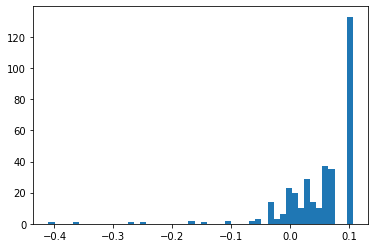

In [ ]:
model = IsolationForest()
model.fit(a7[['APP7']])

a7['outliers'] = pd.Series(model.predict(a7[['APP7']])).apply(lambda x: 'yes' if (x==-1) else 'no')

score=model.decision_function(a7[['APP7']])
#print(score)

plt.hist(score, bins=50)

a7['scores'] = score


a7_anomaly=a7.query('scores<0.0')##anomaly points


fig = px.scatter(a7.reset_index(), x='date_only', y='APP7', color='outliers', 
                 hover_data=['date_only'], title='tickets per day for application7')
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()

## Anomalies in application 8

In [ ]:
a8=d1.iloc[7]
a8=pd.DataFrame(a8)
a8.reset_index(inplace = True)

fig = px.line(a8.reset_index(), x='date_only', y='APP8', title='tickets per day for application8')
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()

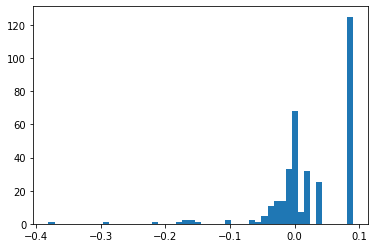

In [ ]:
model = IsolationForest()
model.fit(a8[['APP8']])

a8['outliers'] = pd.Series(model.predict(a8[['APP8']])).apply(lambda x: 'yes' if (x==-1) else 'no')

score=model.decision_function(a8[['APP8']])
#print(score)

plt.hist(score, bins=50)

a8['scores'] = score


a8_anomaly=a8.query('scores<-0.05')##anomaly points


fig = px.scatter(a8.reset_index(), x='date_only', y='APP8', color='outliers', 
                 hover_data=['date_only'], title='tickets per day for application8')
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()

Anomalies in application 9

In [ ]:
a9=d1.iloc[8]
a9=pd.DataFrame(a9)
a9.reset_index(inplace = True)
fig = px.line(a9.reset_index(), x='date_only', y='APP9', title='tickets per day for application9')
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()

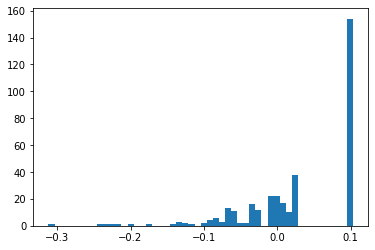

In [ ]:
model = IsolationForest()
model.fit(a9[['APP9']])

a9['outliers'] = pd.Series(model.predict(a9[['APP9']])).apply(lambda x: 'yes' if (x==-1) else 'no')

score=model.decision_function(a9[['APP9']])
#print(score)

plt.hist(score, bins=50)

a9['scores'] = score


a9_anomaly=a9.query('scores<-0.09')##anomaly points


fig = px.scatter(a9.reset_index(), x='date_only', y='APP9', color='outliers', 
                 hover_data=['date_only'], title='tickets per day for application9')
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()

**## Anomaly data points for each application**

In [ ]:
print(a1_anomaly)
print(a2_anomaly)
print(a3_anomaly)
print(a4_anomaly)
print(a5_anomaly)
print(a6_anomaly)
print(a7_anomaly)
print(a8_anomaly)
print(a9_anomaly)

      date_only   APP1 outliers    scores
3    2020-01-12   96.0      yes -0.080050
9    2020-02-02    0.0      yes -0.112178
11   2020-02-09  103.0      yes -0.153399
19   2020-03-08   89.0      yes -0.166925
27   2020-04-05   32.0      yes -0.061626
28   2020-04-11   83.0      yes -0.064335
29   2020-04-12   63.0      yes -0.106347
35   2020-05-03   52.0      yes -0.116359
37   2020-05-10  104.0      yes -0.164025
42   2020-05-30    0.0      yes -0.112178
44   2020-06-06    0.0      yes -0.112178
45   2020-06-07   96.0      yes -0.080050
55   2020-07-12   83.0      yes -0.064335
63   2020-08-09   98.0      yes -0.100086
72   2020-09-12   71.0      yes -0.159839
76   2020-09-26   35.0      yes -0.053260
78   2020-10-03   43.0      yes -0.128752
81   2020-10-11   83.0      yes -0.064335
85   2020-10-25   37.0      yes -0.088801
89   2020-11-08   99.0      yes -0.127995
104  2021-01-02  109.0      yes -0.263663
105  2021-01-03   83.0      yes -0.064335
124  2021-04-03   57.0      yes -0

## isolation forest for weekend

Feature Engineering

In [ ]:
c1=weekend.groupby(['date_only','application']).nunique()
c1.info()
c1=c1.drop(['time','is_weekend','Day name '], axis = 1)

d1=c1.unstack().T
d1=d1.fillna(0)
d1.reset_index(inplace = True)
d1.info()
d1=d1.drop(['level_0'], axis = 1)

d1 = d1.set_index(['application'])
e1=d1.T

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 921 entries, (datetime.date(2020, 1, 4), 'APP1') to (datetime.date(2021, 12, 4), 'APP9')
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   time        921 non-null    int64
 1   number      921 non-null    int64
 2   Day name    921 non-null    int64
 3   is_weekend  921 non-null    int64
dtypes: int64(4)
memory usage: 32.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Columns: 141 entries, level_0 to 2021-12-04
dtypes: float64(139), object(2)
memory usage: 10.0+ KB


## For application1

In [ ]:
a1=d1.iloc[0]
a1=pd.DataFrame(a1)
a1.reset_index(inplace = True)
fig = px.line(a1.reset_index(), x='date_only', y='APP1', title='tickets per day')
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()

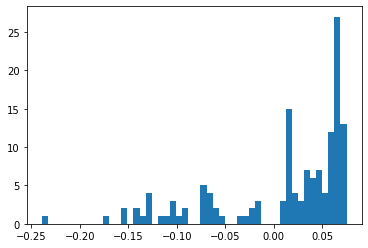

In [ ]:
model = IsolationForest()
model.fit(a1[['APP1']])

a1['outliers'] = pd.Series(model.predict(a1[['APP1']])).apply(lambda x: 'yes' if (x==-1) else 'no')

score=model.decision_function(a1[['APP1']])


plt.hist(score, bins=50)

a1['scores'] = score


a1_anomaly1=a1.query('scores<-0.00')##anomaly points


fig = px.scatter(a1.reset_index(), x='date_only', y='APP1', color='outliers', 
                 hover_data=['date_only'], title='tickets per day')
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()


## For application2

In [ ]:
a2=d1.iloc[1]
a2=pd.DataFrame(a2)
a2.reset_index(inplace = True)
fig = px.line(a2.reset_index(), x='date_only', y='APP2', title='tickets per day')
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()


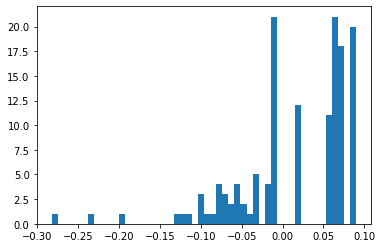

In [ ]:
model = IsolationForest()
model.fit(a2[['APP2']])

a2['outliers'] = pd.Series(model.predict(a2[['APP2']])).apply(lambda x: 'yes' if (x==-1) else 'no')

score=model.decision_function(a2[['APP2']])

plt.hist(score, bins=50)

a2['scores'] = score


a2_anomaly1=a2.query('scores<0.02')##anamoly points


fig = px.scatter(a2.reset_index(), x='date_only', y='APP2', color='outliers', 
                 hover_data=['date_only'], title='demand per day')
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()

In [ ]:
##pycaret

**ANOMALY DETECTION USING PYCARET**




In [1]:
!pip install pycaret

#Loading dependencies

In [2]:
from pycaret.anomaly import *

In [11]:
a1=d.iloc[0]
a1=pd.DataFrame(a1)
a1.reset_index(inplace = True)

a2=d.iloc[1]
a2=pd.DataFrame(a2)
a2.reset_index(inplace = True)


a3=d.iloc[2]
a3=pd.DataFrame(a3)
a3.reset_index(inplace = True)


a4=d.iloc[3]
a4=pd.DataFrame(a4)
a4.reset_index(inplace = True)


a5=d.iloc[4]
a5=pd.DataFrame(a5)
a5.reset_index(inplace = True)


a6=d.iloc[5]
a6=pd.DataFrame(a6)
a6.reset_index(inplace = True)

a7=d.iloc[6]
a7=pd.DataFrame(a7)
a7.reset_index(inplace = True)

a8=d.iloc[7]
a8=pd.DataFrame(a8)
a8.reset_index(inplace = True)

a9=d.iloc[8]
a9=pd.DataFrame(a9)
a9.reset_index(inplace = True)

## Anomalies in application 1

#isolation forest

In [68]:
exp_ano = setup(a1)

## creating a model
iforest=create_model('iforest')
## plotting a model
plot_model(iforest)


# KNN

In [69]:
## creating a model
knn=create_model('knn')
## plotting a model
plot_model(knn)


In [16]:
knn_predictions = predict_model(knn, data = a1)


In [17]:
knn_predictions

,date_only,APP1,Anomaly,Anomaly_Score
0,2020-01-01,1.0,0,2.236068
1,2020-01-02,1.0,0,1.732051
2,2020-01-03,1.0,0,1.732051
3,2020-01-06,28.0,0,1.732051
4,2020-01-07,50.0,0,2.828427
...,...,...,...,...
343,2021-11-03,25.0,0,2.000000
344,2021-11-04,2.0,0,2.000000
345,2021-12-01,118.0,1,3.872983
346,2021-12-02,44.0,0,2.449490


## Anomalies in application 2

In [70]:
exp_ano = setup(a2)
iforest=create_model('iforest')
## plotting a model
plot_model(iforest)

In [71]:
knn=create_model('knn')
## plotting a model
plot_model(knn)


In [22]:
knn_predictions = predict_model(knn, data = a2)


knn_predictions

,date_only,APP2,Anomaly,Anomaly_Score
0,2020-01-01,2.0,0,2.000000
1,2020-01-02,3.0,0,1.732051
2,2020-01-03,1.0,0,1.732051
3,2020-01-06,75.0,0,4.472136
4,2020-01-07,39.0,0,1.414214
...,...,...,...,...
343,2021-11-03,70.0,0,2.828427
344,2021-11-04,4.0,0,1.732051
345,2021-12-01,23.0,0,2.449490
346,2021-12-02,13.0,0,2.828427


## Anomalies in application 3


# Isolation Forest

In [54]:
exp_ano = setup(a3)




## creating a model
iforest=create_model('iforest')
## plotting a model
plot_model(iforest)

# KNN

In [55]:
knn=create_model('knn')
## plotting a model
plot_model(knn)

In [25]:
knn_predictions = predict_model(knn, data = a3)


knn_predictions

,date_only,APP3,Anomaly,Anomaly_Score
0,2020-01-01,0.0,0,2.236068
1,2020-01-02,2.0,0,2.000000
2,2020-01-03,19.0,0,1.732051
3,2020-01-06,48.0,0,1.732051
4,2020-01-07,42.0,0,2.000000
...,...,...,...,...
343,2021-11-03,33.0,0,1.732051
344,2021-11-04,0.0,0,2.000000
345,2021-12-01,47.0,0,2.449490
346,2021-12-02,166.0,1,20.099751


## Anomalies in application 4

##Isolation forest

In [56]:
exp_ano = setup(a4)
## creating a model
iforest=create_model('iforest')
## plotting a model
plot_model(iforest)


#KNN

In [57]:
## creating a model
knn=create_model('knn')
## plotting a model
plot_model(knn)

In [29]:
# generate predictions using trained model
knn_predictions = predict_model(knn, data = a4)


knn_predictions

,date_only,APP4,Anomaly,Anomaly_Score
0,2020-01-01,1.0,0,2.236068
1,2020-01-02,2.0,0,1.732051
2,2020-01-03,4.0,0,2.000000
3,2020-01-06,56.0,0,1.732051
4,2020-01-07,29.0,0,1.732051
...,...,...,...,...
343,2021-11-03,31.0,0,1.732051
344,2021-11-04,1.0,0,1.732051
345,2021-12-01,31.0,0,2.236068
346,2021-12-02,38.0,0,2.000000


## Anomalies in application 5

#Isolation Forest

In [58]:
exp_ano = setup(a5)

## creating a model
iforest=create_model('iforest')
## plotting a model
plot_model(iforest)


#KNN


In [59]:
## creating a model
knn=create_model('knn')
## plotting a model
plot_model(knn)


In [33]:
# generate predictions using trained model
knn_predictions = predict_model(knn, data = a5)


knn_predictions

,date_only,APP5,Anomaly,Anomaly_Score
0,2020-01-01,2.0,0,1.732051
1,2020-01-02,1.0,0,1.732051
2,2020-01-03,1.0,0,1.732051
3,2020-01-06,31.0,0,2.000000
4,2020-01-07,10.0,0,1.414214
...,...,...,...,...
343,2021-11-03,6.0,0,2.000000
344,2021-11-04,2.0,0,1.732051
345,2021-12-01,29.0,0,2.236068
346,2021-12-02,20.0,0,1.732051


## Anomalies in application 6

#Isolation Forest

In [60]:
exp_ano = setup(a6)
## creating a model
iforest=create_model('iforest')
## plotting a model
plot_model(iforest)


#KNN

In [61]:
## creating a model
knn=create_model('knn')
## plotting a model
plot_model(knn)

In [36]:
# generate predictions using trained model
knn_predictions = predict_model(knn, data = a6)


knn_predictions

,date_only,APP6,Anomaly,Anomaly_Score
0,2020-01-01,0.0,0,1.732051
1,2020-01-02,1.0,0,1.414214
2,2020-01-03,0.0,0,1.414214
3,2020-01-06,21.0,0,1.732051
4,2020-01-07,14.0,0,1.732051
...,...,...,...,...
343,2021-11-03,3.0,0,1.732051
344,2021-11-04,0.0,0,1.414214
345,2021-12-01,5.0,0,2.000000
346,2021-12-02,9.0,0,1.732051



## Anomalies in application 7

#Isolation Forest

In [62]:
exp_ano = setup(a7)
## creating a model
iforest=create_model('iforest')
## plotting a model
plot_model(iforest)


# KNN

In [63]:
## creating a model
knn=create_model('knn')
## plotting a model
plot_model(knn)


In [39]:
# generate predictions using trained model
knn_predictions = predict_model(knn, data = a7)


knn_predictions

,date_only,APP7,Anomaly,Anomaly_Score
0,2020-01-01,0.0,0,1.414214
1,2020-01-02,0.0,0,1.414214
2,2020-01-03,0.0,0,1.414214
3,2020-01-06,0.0,0,1.414214
4,2020-01-07,1.0,0,1.000000
...,...,...,...,...
343,2021-11-03,9.0,0,1.732051
344,2021-11-04,0.0,0,1.414214
345,2021-12-01,9.0,0,2.000000
346,2021-12-02,4.0,0,1.414214


## Anomalies in application 8

#Isolation Forest

In [64]:
exp_ano = setup(a8)




## creating a model
iforest=create_model('iforest')
## plotting a model
plot_model(iforest)


#KNN

In [65]:
## creating a model
knn=create_model('knn')
## plotting a model
plot_model(knn)


In [43]:
# generate predictions using trained model
knn_predictions = predict_model(knn, data = a8)


knn_predictions

,date_only,APP8,Anomaly,Anomaly_Score
0,2020-01-01,0.0,0,1.414214
1,2020-01-02,0.0,0,1.414214
2,2020-01-03,0.0,0,1.414214
3,2020-01-06,7.0,0,2.000000
4,2020-01-07,2.0,0,1.732051
...,...,...,...,...
343,2021-11-03,19.0,0,1.732051
344,2021-11-04,1.0,0,1.414214
345,2021-12-01,24.0,0,2.000000
346,2021-12-02,26.0,0,2.000000


## Anomalies in application 9

#Isolation forest

In [66]:
exp_ano = setup(a9)
## creating a model
iforest=create_model('iforest')
## plotting a model
plot_model(iforest)

#KNN

In [67]:
## creating a model
knn=create_model('knn')
## plotting a model
plot_model(knn)

In [47]:
# generate predictions using trained model
knn_predictions = predict_model(knn, data = a9)


knn_predictions

,date_only,APP9,Anomaly,Anomaly_Score
0,2020-01-01,0.0,0,1.414214
1,2020-01-02,0.0,0,1.414214
2,2020-01-03,0.0,0,1.414214
3,2020-01-06,0.0,0,1.414214
4,2020-01-07,0.0,0,1.414214
...,...,...,...,...
343,2021-11-03,27.0,0,2.000000
344,2021-11-04,1.0,0,1.414214
345,2021-12-01,27.0,0,2.236068
346,2021-12-02,26.0,0,2.236068
